# Resampling dataset:

In [ ]:
# importing shutil module
import shutil

In [3]:
import os
import random
import pandas as pd

Aquí toca clonar el repositorio

In [1]:
!git clone --single-branch --branch master https://github.com/milenacartagenaservi/melanoma.git

Cloning into 'melanoma'...
remote: Enumerating objects: 588, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 588 (delta 0), reused 0 (delta 0), pack-reused 584
Receiving objects: 100% (588/588), 326.53 MiB | 26.15 MiB/s, done.
Updating files: 100% (602/602), done.


In [4]:
# Leer el dataset de Pandas
train_df = pd.read_csv("/content/melanoma/sampled_train2.csv")

In [5]:
train_df['target'].value_counts()

target
1    250
0    250
Name: count, dtype: int64

In [6]:
# Leer el dataset de Pandas
test_df = pd.read_csv("/content/melanoma/sampled_test2.csv")

In [7]:
test_df['target'].value_counts()

target
0    50
1    50
Name: count, dtype: int64

In [9]:
## Creación array para imágenes y labels de entrenamiento
import os
import cv2
import numpy as np

#Resize images
SIZE = 256

# Ruta de la carpeta con las imágenes
IMAGE_PATH_TRAIN = "/content/melanoma/sampled_train2"

# Inicializar arrays vacíos
train_images = []
train_labels = []

# Recorrer cada fila del DataFrame
for i in range(len(train_df)):
  # Obtener el nombre de la imagen
  image_name = train_df.loc[i, "image_name"] + ".jpg"

  # Obtener la etiqueta
  label = train_df.loc[i, "target"]

  # Ruta completa de la imagen
  img_path = os.path.join(IMAGE_PATH_TRAIN, image_name)

  # Leer la imagen con OpenCV
  img = cv2.imread(img_path, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (SIZE, SIZE))
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  # Agregar la imagen al array
  train_images.append(img)

  # Agregar la etiqueta al array
  train_labels.append(label)

# Imprimir la longitud de los arrays para verificar
print(f"Longitud de train_images: {len(train_images)}")
print(f"Longitud de train_labels: {len(train_labels)}")

#Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Longitud de train_images: 500
Longitud de train_labels: 500


In [10]:
# Ruta de la carpeta con las imágenes
IMAGE_PATH_TEST = "/content/melanoma/sampled_test2"

# Capture test/validation data and labels into respective lists

test_images = []
test_labels = []

# Recorrer cada fila del DataFrame
for i in range(len(test_df)):
  # Obtener el nombre de la imagen
  image_name = test_df.loc[i, "image_name"] + ".jpg"

  # Obtener la etiqueta
  label = test_df.loc[i, "target"]

  # Ruta completa de la imagen
  img_path = os.path.join(IMAGE_PATH_TEST, image_name)

  # Leer la imagen con OpenCV
  img = cv2.imread(img_path, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (SIZE, SIZE))
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  # Agregar la imagen al array
  test_images.append(img)

  # Agregar la etiqueta al array
  test_labels.append(label)

# Imprimir la longitud de los arrays para verificar
print(f"Longitud de test_images: {len(test_images)}")
print(f"Longitud de test_labels: {len(test_labels)}")

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Longitud de test_images: 100
Longitud de test_labels: 100


In [11]:
train_images

array([[[[166, 111, 114],
         [166, 116, 117],
         [168, 116, 118],
         ...,
         [172, 124, 122],
         [172, 119, 113],
         [170, 122, 118]],

        [[168, 113, 118],
         [168, 113, 118],
         [168, 113, 118],
         ...,
         [173, 121, 125],
         [170, 116, 116],
         [166, 121, 118]],

        [[162, 110, 114],
         [169, 116, 122],
         [166, 114, 116],
         ...,
         [174, 125, 128],
         [172, 120, 122],
         [169, 118, 117]],

        ...,

        [[126,  81,  88],
         [129,  80,  84],
         [137,  91,  93],
         ...,
         [151,  99,  85],
         [152, 100,  87],
         [151,  99,  78]],

        [[129,  87,  90],
         [130,  77,  83],
         [137,  91,  93],
         ...,
         [151,  95,  82],
         [149,  91,  79],
         [150,  99,  82]],

        [[126,  77,  87],
         [123,  75,  75],
         [128,  83,  84],
         ...,
         [148,  92,  77],
        

In [12]:
train_labels

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [13]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels, test_images, test_labels

In [14]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [15]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [16]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [17]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False

In [18]:
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

16/16 [==============================] - 381s 24s/step


In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
#This is our X input to XGBoost
X_for_training = features

In [ ]:
#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train) #For sklearn no one hot encoding

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step


In [ ]:
#Now predict using the trained RF model.
prediction = model.predict(X_test_features)

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

Accuracy =  0.81


<Axes: >

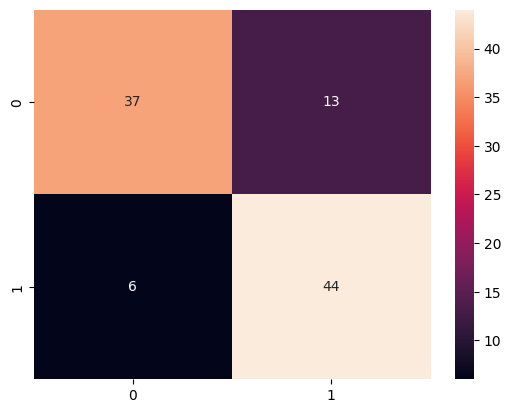

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
The prediction for this image is:  1
The actual label for this image is:  1


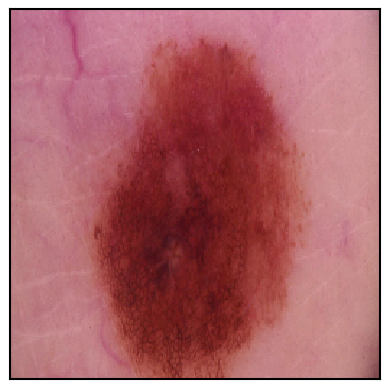

In [ ]:
#Check results on a few select images
import seaborn_image as isns

n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
isns.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0]
# prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])